# Machine Astrophysics

This study explores the discovery potential of learning systems, how the data can be converted into formulas.

The first case study is the retrograde motion of Mars from the perspective of Earth. This is a very simple system of two co-centric, almost circular, orbits where the external one appears to be moving backwards at certain times. 

Such a system was an important cornerstone in the history of astrophysics, that inspired Ptolemy for his epicycles to model the system, later to be replaced by a simpler model of Copernicus.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from Visualisations import *

In [3]:
from Transformations import *
import Generate as gen

## Generate system

In [4]:
s = gen.System(7000)
s.generate(2)
s.view(0)

New body
New body


## Visualise the system

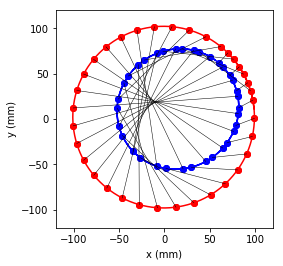

In [9]:
cmap = ['b','m','c','y','g','r','k']

ax = plt.gca()
ax.cla() # clear things for fresh plot
ax.cla()
ax.set_xlim([-120,120])
ax.set_ylim([-120,120])

t_res = 200
plot_orbit(ax,s,0)
plot_orbit(ax,s,1)
plot_position(ax,s,0,t_res)
plot_position(ax,s,1,t_res)
#plot_observation(ax,s,0,-1,t_res)
plot_observation(ax,s,1,0,t_res)

plt.xlabel('x (mm)')
plt.ylabel('y (mm)')

plt.axes().set_aspect('equal')
plt.show()

## Observe the planet angle

In [5]:
phis = s.cylindrical_relative[1][:,1]

In [6]:
phis /= np.pi

## Predict the planet angle from time series 

In [7]:
n = 3
series = make_time_series(phis, depth=n+1)
y = series[:,n].reshape(-1,1)
x = series[:,0:n].reshape(-1,n)

In [8]:
x.shape

(96, 3)

In [9]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [10]:
inputs = Input(shape=(n,), dtype='float', name='main_input')
layer = Dense(60, activation='relu', kernel_initializer='normal')(inputs)
layer = Dense(15, activation='relu', kernel_initializer='normal')(layer)
predictions = Dense(1, kernel_initializer='normal')(layer)
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam',
              loss='mean_squared_error')

In [11]:
model.fit(x, y)

Epoch 1/1
96/96 [==============================] - 0s - loss: 0.6276     


In [13]:
y_pred = model.predict(x)

In [19]:
x[0]

array([-0.75156261, -0.75307415, -0.75453663])

In [20]:
y_pred[0]

array([-0.01054882], dtype=float32)

In [21]:
y_true[0]

array([-0.75595202])

In [22]:
((y_true - y_pred) / y_true)[0]

array([ 0.98604564])